In [1]:
import numpy as np
# import scipy as sp
import matplotlib.pyplot as plt
import scipy.constants as constants

Part 1: Theoretical derivations

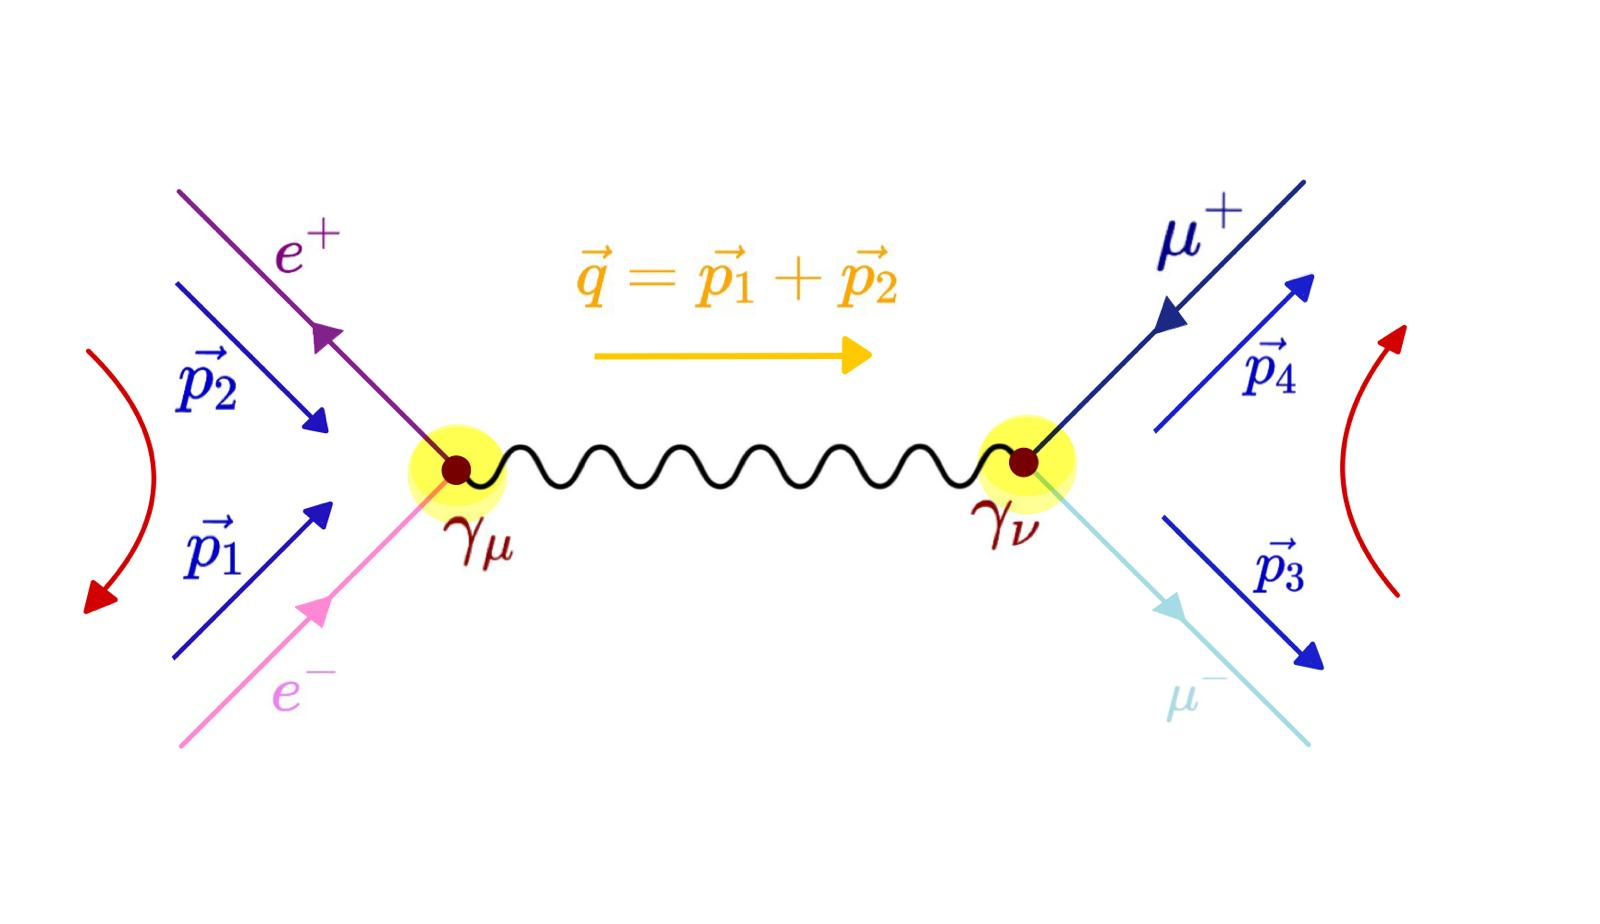

In [2]:
from IPython.display import Image
Image('beam.jpeg')

MATRIX ELEMENT (from Feynman rules)

$$\begin{align}
M &= \color{purple}{\overline{v}(p_1, p_2)}\color{#D9CD25}{ie\gamma ^{\mu}}\color{violet}{u(p_1, s_1)}\color{orange}{\Big(-\frac{i\eta \mu \nu }{q^2}\Big)} \color{lightblue}{\overline{u}(p_3, s_3)}\color{#D9CD25}{ie\gamma ^\nu} \color{darkblue}{v(p_4, s_4)} \\
&= \frac{ie^2}{s}\Big[\overline{v}(p_2, s_2)\gamma ^{\mu}u (p_1,s_1)\eta_{\mu \nu}\overline{u}(p_3, s_3)\gamma^{\nu}v(p_4, s_4)\Big]
\end{align}$$

Considering the complex conjugate it is possible calculating the average modulus squared.

$$\begin{align}
\langle |M^2| \rangle
= \frac{1}{4} \sum_{Spin} \frac{e^4}{s^2} \Big[\overline{v}(p_2, s_2)\gamma^\mu u(p_1, s_1) \eta_{\mu \nu}\overline{u}(p_3, s_3)\gamma^\nu v(p_4, s_4) \Big] \times 
\Big[\overline{u}(p_1, s_1)\gamma^\rho v(p_2, s_2) \eta_{\rho \sigma}\overline{v}(p_4, s_4)\gamma^\sigma u(p_3, s_3) \Big]
\end{align}$$

Using the completeness relations and the $\gamma$ trace properties as well as making use of a approximation we obtain the following. 

$$\begin{align}
&\sum_s u(p, s) \overline{u}(p, s) = \phi + m \notag \\
&\sum_s v(p, s) \overline{v}(p, s) = \phi - m \tag{completeness reations} \\

&\phi = p\gamma^\mu \tag{$\gamma$ trace properties} \\

&E \gg m_e \Rightarrow m_e \approx 0 \tag{approximation} \\ \notag \\

\Rightarrow
\langle |M|^2 \rangle &= \frac{8e^4}{s^2} \Big[(p_1 p_3)(p_2 p_4) + (p_1 p_4)(p_2 p_3) + m^2 (p_1 p_2)\Big] \notag
\end{align}$$

We have to express momenta $p_i$ as a function of $s, \theta$ in the center-of-mass-frame. 
Considering 1, 2 and 3 and substituting momenta $p_i$ (funtion of $s,\theta$) we derive $\langle |M|\rangle$.

1) For electrons: $m_e \approx 0$ with $E^2 = p^2 + m^2 \Rightarrow E \approx |p|$ (only for electrons/positrons)
2) In the center-of-mass-frame imagine a scattering on the z-axis
3) For muons: $ m_\mu \neq 0$ with $E^2 = p^2 + m^2 \Rightarrow p = \sqrt{E^2-m^2_\mu}$
 
$$
\begin{align}
\langle |M|\rangle = e^4 \Bigg[\bigg(1+\frac{4m^2_\mu}{s}\bigg) + \bigg(1-\frac{4m^2_\mu}{s}\bigg) cos^2\theta\Bigg] \notag
\end{align}
$$


With the definition of $\langle |M|\rangle$ we can write the differential cross section $\frac{d \sigma }{d \Omega}$.

$$
\begin{align}
\frac{d \sigma }{d \Omega} = \frac{1}{64 \pi^2s}\frac{|p_f|}{|p_i|}\langle |M|\rangle \notag

\end{align}
$$

Substituing the fine structure constant $\alpha$ results in the following.

$$
\begin{align}
\frac{d \sigma }{d \Omega} = \frac{\alpha^2}{4s}\sqrt{1-\frac{4m^2}{s}} \Bigg[\bigg(1+\frac{4m^2_\mu}{s}\bigg) + \bigg(1-\frac{4m^2_\mu}{s}\bigg) cos^2\theta\Bigg] \notag

\end{align}
$$



Part 2: Plots of the differential cross section and moments

In [3]:
#Constants and Parameters
m = 105.658 # m_mu (MeV)
m_e = 0.511 # m_el (MeV)
s1 = (2.5*m)**2
s2 = (2.7*m)**2
s3 = (3*m)**2
n_events = int(1e7)
bins = 100
theta_random = np.random.uniform(0, np.pi, n_events)
phi_random = np.random.uniform(0, 2*np.pi, n_events)
E = np.sqrt(s1)/2 # energy in the c.o.m (equal for every particle)

In [4]:
def differential_xs(theta, s):
    m = 105.658 # MeV
    hbarc2_to_nb = 3.89379e11
    beta = np.sqrt(1 - 4*m**2/s)
    ds_nat = (constants.alpha**2 / (4 * s)) * beta * ((1 + 4*m**2/s) + (1 - 4*m**2/s) * np.cos(theta)**2)
    return ds_nat * hbarc2_to_nb


def px_component(s, m, theta, phi):
    return np.sqrt(s/4 - m**2) * np.sin(theta) * np.cos(phi)

def py_component(s, m, theta, phi):
    return np.sqrt(s/4 - m**2) * np.sin(theta) * np.sin(phi)

def pz_component(s, m, theta):
  return np.sqrt(s/4-m**2)*np.cos(theta)

def pt_component(s, m, theta):
   return np.sqrt(s/4 - m**2) * np.sin(theta)

def weights(theta, s):
  w = differential_xs(theta, s)*np.sin(theta)
  return w


def boost_cm_to_lab(s, m, m_e, E, pz):
   E2 = (s-2*m_e**2)/(2*m_e)
   beta = np.sqrt(E2**2-m_e**2)/(E2 + m_e)
   gamma = 1/np.sqrt(1-beta**2)
   pz_lab = gamma*(pz+beta*E)
   E_lab = gamma*(E+beta*pz)
   # px, py unchanged because boost on z axis
   return E_lab, pz_lab

def histo(variable, bins, weights, var_name, unit):

    fig, ax = plt.subplots(dpi=150)
    ax.hist(variable, bins = bins, weights=weights, alpha = 0.7, color = 'blue', density = True)
    ax.set_xlabel(rf'${var_name} \, ({unit})$')
    ax.set_ylabel('Counts')
    ax.set_title(rf'${var_name}$ Distribution')
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', direction='in', 
                top=True, right=True, labelsize=12)

    
    ax.tick_params(axis='both', which='minor', length=4)
    ax.tick_params(axis='both', which='major', length=7)

    plt.show()





In [5]:
# check ok
# plt.hist(weights(theta_random, s1))

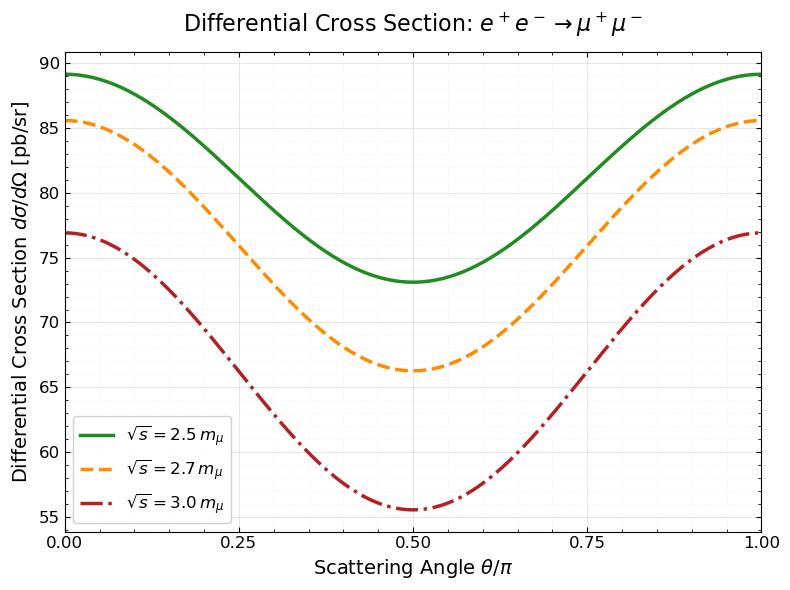

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
theta = np.linspace(0, np.pi, 200)

ax.plot(theta / np.pi, differential_xs(theta, s1), 
        label=r'$\sqrt{s} = 2.5 \, m_{\mu}$', 
        color='forestgreen', lw=2.5, linestyle='-')

ax.plot(theta / np.pi, differential_xs(theta, s2), 
        label=r'$\sqrt{s} = 2.7 \, m_{\mu}$', 
        color='darkorange', lw=2.5, linestyle='--')

ax.plot(theta / np.pi, differential_xs(theta, s3), 
        label=r'$\sqrt{s} = 3.0 \, m_{\mu}$', 
        color='firebrick', lw=2.5, linestyle='-.')

ax.set_title(r'Differential Cross Section: $e^+e^- \to \mu^+\mu^-$', fontsize=16, pad=15)

ax.set_xlabel(r'Scattering Angle $\theta / \pi$', fontsize=14)
ax.set_ylabel(r'Differential Cross Section $d\sigma/d\Omega$ [pb/sr]', fontsize=14)

ax.set_xlim(0, 1)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.tick_params(axis='both', which='major', labelsize=12, direction='in', top=True, right=True)
ax.tick_params(axis='both', which='minor', direction='in', top=True, right=True)
ax.minorticks_on()

ax.grid(which='major', linestyle='-', linewidth=0.7, alpha=0.3)
ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.2)

ax.legend(fontsize=12, loc='best', frameon=True, fancybox=True, framealpha=0.9)

plt.tight_layout()
plt.show()

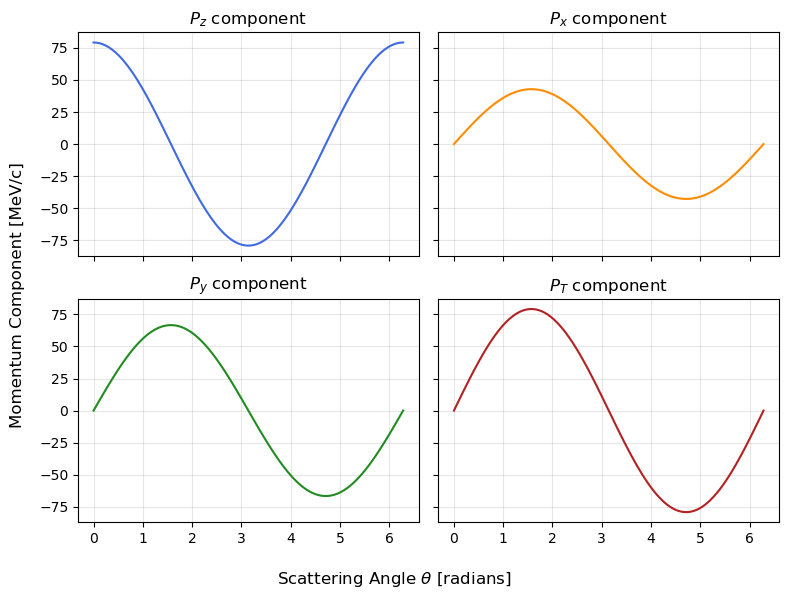

In [7]:
theta = np.linspace(0, 2*np.pi, 100)
pz = pz_component(s1, m, theta)
px = px_component(s1, m, theta, 1) # Assuming 1
py = py_component(s1, m, theta, 1)
pt = pt_component(s1, m, theta)

fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)

ax[0][0].plot(theta, pz, color='royalblue')
ax[0][0].set_title(r'$P_z$ component')
ax[0][0].grid(True, alpha=0.3)

ax[0][1].plot(theta, px, color='darkorange')
ax[0][1].set_title(r'$P_x$ component')
ax[0][1].grid(True, alpha=0.3)

ax[1][0].plot(theta, py, color='forestgreen')
ax[1][0].set_title(r'$P_y$ component')
ax[1][0].grid(True, alpha=0.3)

ax[1][1].plot(theta, pt, color='firebrick')
ax[1][1].set_title(r'$P_T$ component')
ax[1][1].grid(True, alpha=0.3)

fig.supxlabel(r'Scattering Angle $\theta$ [radians]', fontsize=12)
fig.supylabel(r'Momentum Component [MeV/c]', fontsize=12)

plt.tight_layout()
plt.show()

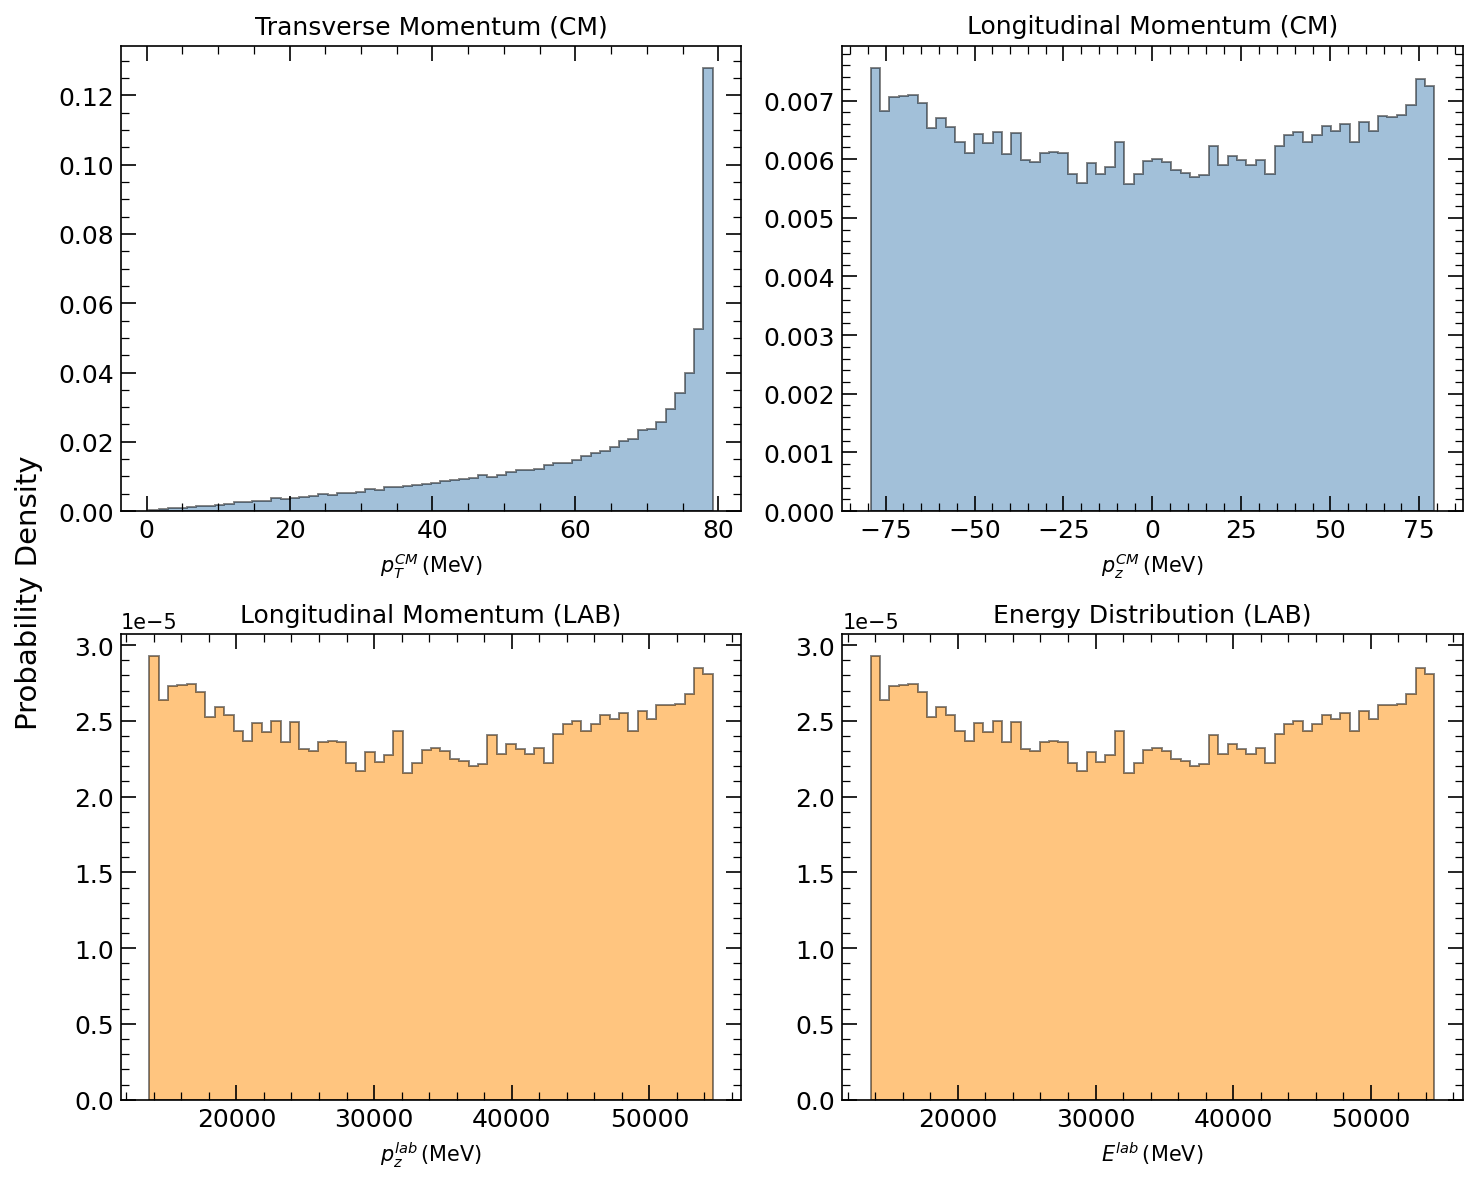

In [8]:
import numpy as np
import matplotlib.pyplot as plt

num_events = 100000

def run_monte_carlo(n_events, s, m):
    theta_test = np.linspace(0, np.pi, 1000)
    w_max = np.max(weights(theta_test, s))

    accepted_theta = []
    accepted_phi = []

    while len(accepted_theta) < n_events:
        theta_cand = np.random.uniform(0, np.pi)
        phi_cand = np.random.uniform(0, 2*np.pi)
        r = np.random.uniform(0, w_max)

        if r < weights(theta_cand, s):
            accepted_theta.append(theta_cand)
            accepted_phi.append(phi_cand)

    return np.array(accepted_theta), np.array(accepted_phi)

thetas, phis = run_monte_carlo(num_events, s1, m)

pz_cm = pz_component(s1, m, thetas)
px_cm = px_component(s1, m, thetas, phis)
py_cm = py_component(s1, m, thetas, phis)
pt_cm = pt_component(s1, m, thetas)
E_cm = np.full_like(thetas, np.sqrt(s1)/2)

E_lab, pz_lab = boost_cm_to_lab(s1, m, m_e, E_cm, pz_cm)


fig, ax = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

# Plotting with individual titles and x-labels
ax[0][0].hist(pt_cm, bins=60, histtype='stepfilled', color='steelblue', alpha=0.5, density=True, edgecolor='black', linewidth=0.9)
ax[0][0].set_xlabel(r'$p_T^{CM} \, (\text{MeV})$')
ax[0][0].set_title('Transverse Momentum (CM)')
# ax[0][0].grid(axis='y', alpha=0.3)
ax[0][0].minorticks_on()
ax[0][0].tick_params(axis='both', which='both', direction='in', 
                top=True, right=True, labelsize=12)
ax[0][0].tick_params(axis='both', which='minor', length=4)
ax[0][0].tick_params(axis='both', which='major', length=7)

ax[0][1].hist(pz_cm, bins=60, histtype='stepfilled', color='steelblue', alpha=0.5, density=True, edgecolor='black', linewidth=0.9)
ax[0][1].set_xlabel(r'$p_z^{CM} \, (\text{MeV})$')
ax[0][1].set_title('Longitudinal Momentum (CM)')
# ax[0][1].grid(axis='y', alpha=0.3)
ax[0][1].minorticks_on()
ax[0][1].tick_params(axis='both', which='both', direction='in', 
                top=True, right=True, labelsize=12)
ax[0][1].tick_params(axis='both', which='minor', length=4)
ax[0][1].tick_params(axis='both', which='major', length=7)


ax[1][0].hist(pz_lab, bins=60, histtype='stepfilled', color='darkorange', alpha=0.5, density=True, edgecolor='black', linewidth=0.9)
ax[1][0].set_xlabel(r'$p_z^{lab} \, (\text{MeV})$')
ax[1][0].set_title('Longitudinal Momentum (LAB)')
# ax[1][0].grid(axis='y', alpha=0.3)
ax[1][0].minorticks_on()
ax[1][0].tick_params(axis='both', which='both', direction='in', 
                top=True, right=True, labelsize=12)
ax[1][0].tick_params(axis='both', which='minor', length=4)
ax[1][0].tick_params(axis='both', which='major', length=7)

ax[1][1].hist(E_lab, bins=60, histtype='stepfilled', color='darkorange', alpha=0.5, density=True, edgecolor='black', linewidth=0.9)
ax[1][1].set_xlabel(r'$E^{lab} \, (\text{MeV})$')
ax[1][1].set_title('Energy Distribution (LAB)')
# ax[1][1].grid(axis='y', alpha=0.3)
ax[1][1].minorticks_on()
ax[1][1].tick_params(axis='both', which='both', direction='in', 
                top=True, right=True, labelsize=12)
ax[1][1].tick_params(axis='both', which='minor', length=4)
ax[1][1].tick_params(axis='both', which='major', length=7)



fig.supylabel('Probability Density', fontsize=14)

plt.tight_layout()
plt.show()

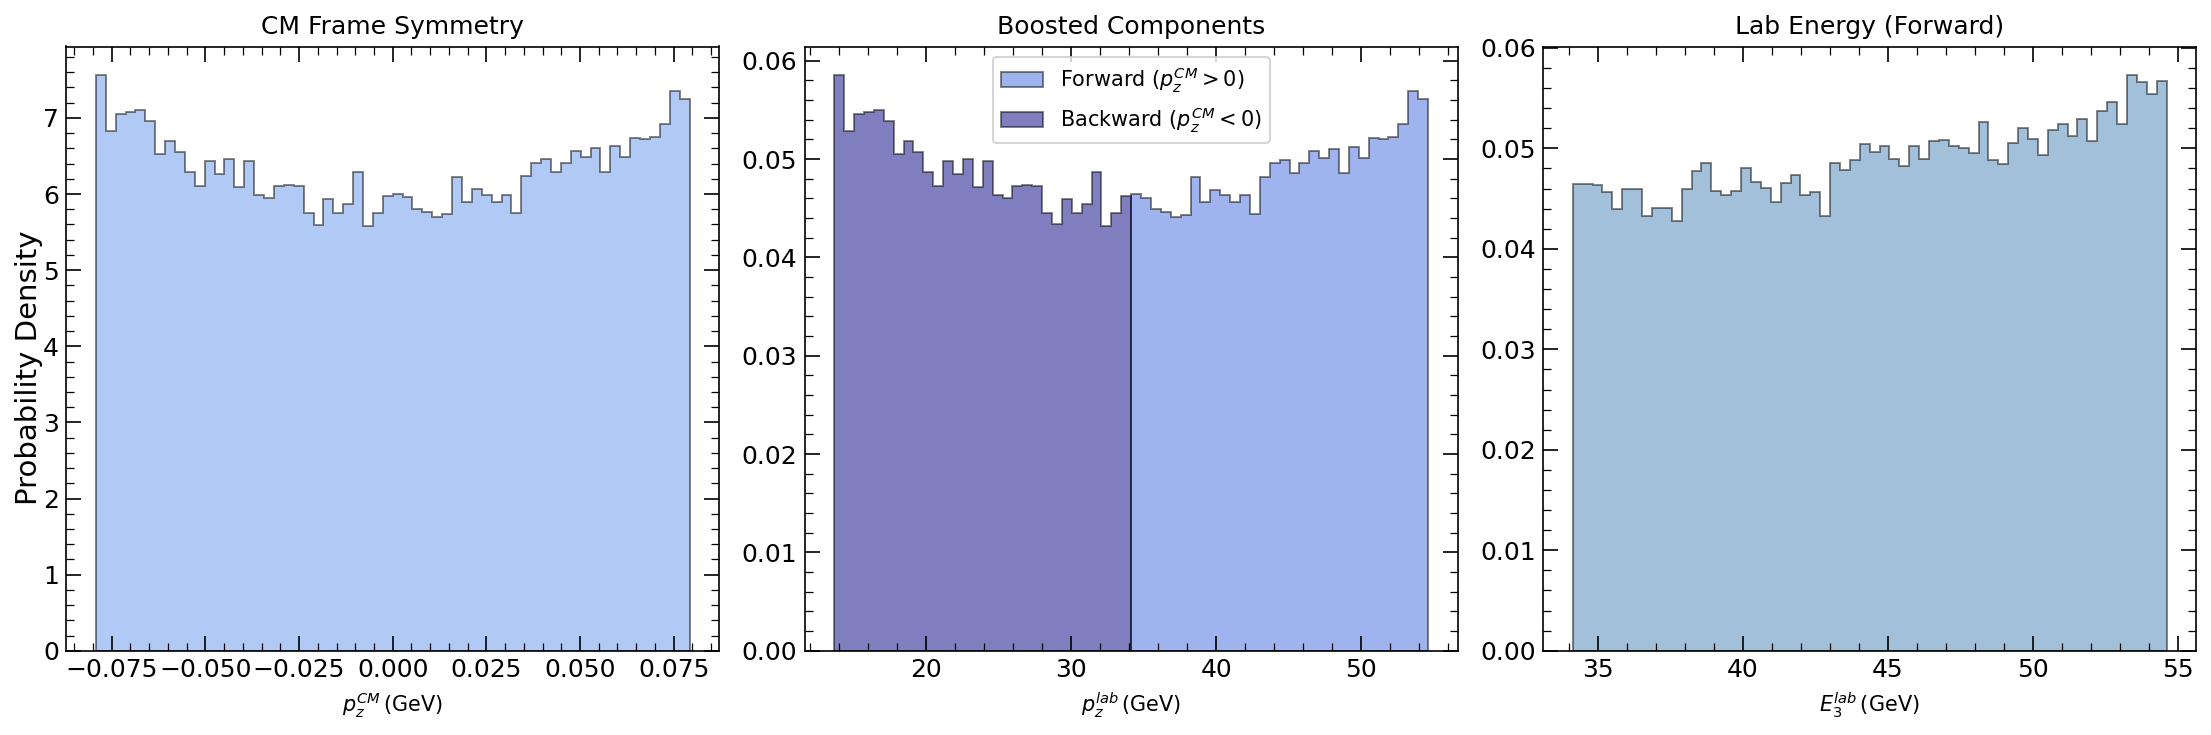

In [9]:
pz_cm = pz_component(s1, m, thetas)
E_cm = np.full_like(thetas, np.sqrt(s1)/2)

mask3 = pz_cm > 0
mask4 = pz_cm < 0

E_3, pz3 = boost_cm_to_lab(s1, m, m_e, E_cm[mask3], pz_cm[mask3])
E_4, pz4 = boost_cm_to_lab(s1, m, m_e, E_cm[mask4], pz_cm[mask4])

fig, ax = plt.subplots(1, 3, figsize=(15, 5), dpi=150)

ax[0].hist(pz_cm / 1e3, bins=60, histtype='stepfilled', color='cornflowerblue', alpha=0.5, density=True, edgecolor='black', linewidth=0.9)
ax[0].set_xlabel(r'$p_z^{CM} \, (\text{GeV})$')
ax[0].set_title('CM Frame Symmetry')
# ax[0].grid(axis='y', alpha=0.3)
ax[0].minorticks_on()
ax[0].tick_params(axis='both', which='both', direction='in', 
                top=True, right=True, labelsize=12)
ax[0].tick_params(axis='both', which='minor', length=4)
ax[0].tick_params(axis='both', which='major', length=7)

ax[1].hist(pz3 / 1e3, bins=30, histtype='stepfilled', color='royalblue', alpha=0.5, label='Forward ($p_z^{CM}>0$)', density=True, edgecolor='black', linewidth=0.9)
ax[1].hist(pz4 / 1e3, bins=30, histtype='stepfilled', color='navy', alpha=0.5, label='Backward ($p_z^{CM}<0$)', density=True, edgecolor='black', linewidth=0.9)
ax[1].set_xlabel(r'$p_z^{lab} \, (\text{GeV})$')
ax[1].set_title('Boosted Components')
ax[1].legend()
# ax[1].grid(axis='y', alpha=0.3)
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='both', direction='in', 
                top=True, right=True, labelsize=12)
ax[1].tick_params(axis='both', which='minor', length=4)
ax[1].tick_params(axis='both', which='major', length=7)


ax[2].hist(E_3 / 1e3, bins=60, histtype='stepfilled', color='steelblue', alpha=0.5, density=True, edgecolor='black', linewidth=0.9)
ax[2].set_xlabel(r'$E_3^{lab} \, (\text{GeV})$')
ax[2].set_title('Lab Energy (Forward)')
# ax[2].grid(axis='y', alpha=0.3)
ax[2].minorticks_on()
ax[2].tick_params(axis='both', which='both', direction='in', 
                top=True, right=True, labelsize=12)
ax[2].tick_params(axis='both', which='minor', length=4)
ax[2].tick_params(axis='both', which='major', length=7)

fig.supylabel('Probability Density', fontsize=14)

plt.tight_layout()
plt.show()


5. produce a synthetic dataset of about $N=10^5$ (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon);


In [10]:
import pandas as pd


num_events = int(10e5)
thetas, phis = run_monte_carlo(num_events, s1, m)

pz_cm_minus = pz_component(s1, m, thetas)
pz_cm_plus = - pz_cm_minus
px_cm = px_component(s1, m, thetas, phis)
py_cm = py_component(s1, m, thetas, phis)
pt_cm = pt_component(s1, m, thetas)
E_cm = np.full_like(thetas, np.sqrt(s1)/2)

E_lab, pz_lab_plus = boost_cm_to_lab(s1, m, m_e, E_cm, pz_cm_plus)
E_lab, pz_lab_minus = boost_cm_to_lab(s1, m, m_e, E_cm, pz_cm_minus)



df = pd.DataFrame({
    "px_minus": px_cm,
    "py_minus": py_cm, 
    "pz_minus": pz_lab_minus,

    "px_plus": - px_cm,
    "py_plus": - py_cm, 
    "pz_plus": pz_lab_plus,

})

df.head(n=20)

,px_minus,py_minus,pz_minus,px_plus,py_plus,pz_plus
0,9.962856,42.913889,51159.383304,-9.962856,-42.913889,17110.732920
1,-23.142410,-6.747357,14624.518885,23.142410,6.747357,53645.597339
2,-6.416398,4.470576,54516.269376,6.416398,-4.470576,13753.846849
3,-49.173064,-30.627922,20160.406178,49.173064,30.627922,48109.710047
4,41.521609,67.271444,35551.664888,-41.521609,-67.271444,32718.451336
5,-62.432517,-36.931388,25889.507338,62.432517,36.931388,42380.608887
6,23.719840,73.555010,38660.392380,-23.719840,-73.555010,29609.723845
7,-24.040376,32.121091,16472.974123,24.040376,-32.121091,51797.142102
8,20.701728,-15.690633,53484.595296,-20.701728,15.690633,14785.520928
9,34.770465,32.926025,50453.670919,-34.770465,-32.926025,17816.445306


6. assume a $3$ cm thick Beryllium block is used as target and a rate of positron on target of $10^6$ Hz. Compute the rescaling factor (weight) you need to apply to the $N$ simulated events such that they represent the statistics that would be gathered in a week of countinuous operations;


In [11]:

# Be data:
A = 9.01 # Be mass number [g/cm^3]
L = 3 # Be thicness [cm]
ro = 1.845 # Be density [g/cm^3]

N_A = constants.Avogadro # Avogadro's number
time = 7*24*60*60 # operation time = 1 week
R = 10e6 # rate of incident positrons [Hz]
N_MC = num_events

n = ro*L*N_A/A
xs = 4*np.pi * constants. alpha**2/3*s1 * np.sqrt(1-4*m**2/s1) * (1+ 2*m**2/s1) # integrated cross section
N_exp = R * time * n * xs # number of events expected

W = N_exp/N_MC # rescaling factors to be applied to actual weights 

7. repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius $r=1$ cm and for the latter a gaussian distribution centered at the nominal beam energy and a width of $0.5$ GeV;


In [12]:
# PLEASE FIX IT
# it does not work because of how the MC run function was defined. 
# it's okay if s is a scalar, but not if it's an array containing N_MC values as in this case


N_MC = int(10e5)

# energy spread
s = np.random.normal(s1, 500, N_MC) # mu [MeV], sigma [MeV], size 

# tranverse shape
R = 1 # [cm]
u = np.random.uniform(0, 2, N_MC)
phi_v = np.random.uniform(0, 2*np.pi, N_MC)
r = R*np.sqrt(u)
x_v, y_v = r*np.cos(phi_v), r*np.sin(phi_v)

# old simulation remains unchanged
thetas, phis = run_monte_carlo(N_MC, s, m)
pz_cm_minus = pz_component(s, m, thetas)
pz_cm_plus = - pz_cm_minus
px_cm = px_component(s, m, thetas, phis)
py_cm = py_component(s, m, thetas, phis)
pt_cm = pt_component(s, m, thetas)
E_cm = np.full_like(thetas, np.sqrt(s)/2)

E_lab, pz_lab_plus = boost_cm_to_lab(s, m, m_e, E_cm, pz_cm_plus)
E_lab, pz_lab_minus = boost_cm_to_lab(s, m, m_e, E_cm, pz_cm_minus)



df = pd.DataFrame({
    "px_minus": px_cm,
    "py_minus": py_cm, 
    "pz_minus": pz_lab_minus,

    "px_plus": - px_cm,
    "py_plus": - py_cm, 
    "pz_plus": pz_lab_plus,

    "x_vertex": x_v, 
    "y_vertex": y_v, 

})

df.head(n=20)




ValueError: operands could not be broadcast together with shapes (1000000,) (1000,) 

8. given that the electrons traversing the target lose energy as $E(z)=E_0 \exp{-z/X_0}$ (with z the longitudinal coordinate of the target, the one parallel to the beam direction and $X_0$ is the Beryllium radiation length), compute the nominal beam energy $E_0$ such that muon pairs can be generated along the whole length of the target;